In [1]:
"Hello"

'Hello'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('auto-mpg.csv')

In [4]:
df.shape

(398, 9)

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [8]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [9]:
for i in ['cylinders','model year','origin']:
    print(df[i].value_counts())

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64
73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: model year, dtype: int64
1    249
3     79
2     70
Name: origin, dtype: int64


# Let's plot distribution of some of our characters

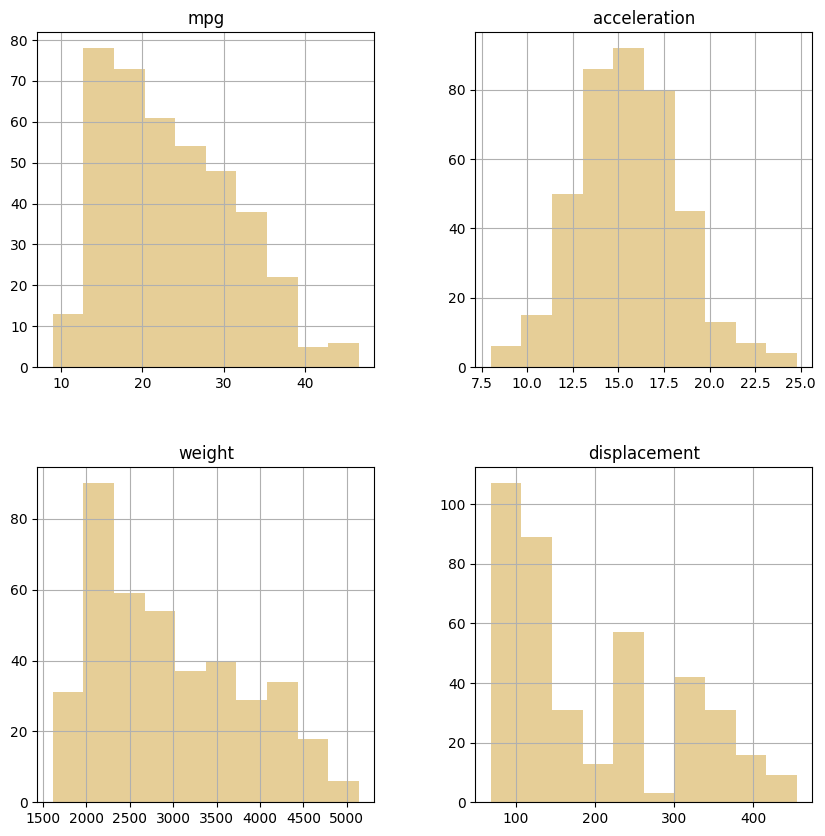

In [63]:
plot_hist=df.hist(['mpg','acceleration','weight','displacement']
                  ,bins='sturges',figsize=(10,10),color='#e6ce97')

<Axes: >

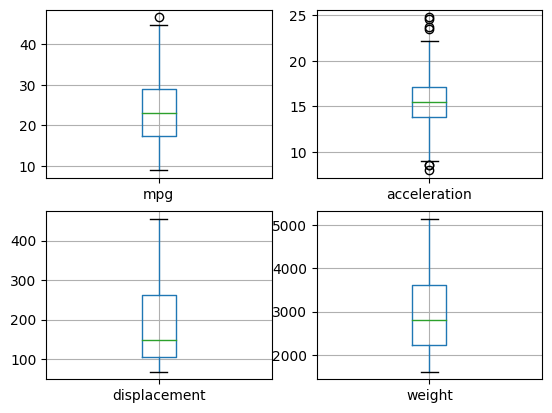

In [11]:
plt.subplot(2,2,1)
df.boxplot('mpg')
plt.subplot(2,2,2)
df.boxplot('acceleration')
plt.subplot(2,2,3)
df.boxplot('displacement')
plt.subplot(2,2,4)
df.boxplot('weight')


# Corelation of charcters with each other.

In [60]:
corr=df.corr()
corr['mpg'].to_frame()

C:\Users\OMKAR\AppData\Local\Temp\ipykernel_13692\1630250594.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


,mpg
mpg,1.000000
cylinders,-0.775396
displacement,-0.804203
weight,-0.831741
acceleration,0.420289
model year,0.579267
origin,0.563450


**Above chart shows relationship between target 'MPG' variable with other predictive variable**

C:\Users\OMKAR\AppData\Local\Temp\ipykernel_13692\133148687.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

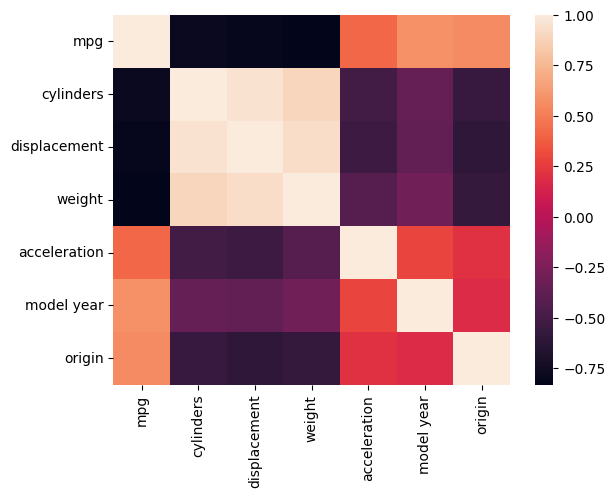

In [56]:
sns.heatmap(corr)

In [54]:
corrc=corr[['acceleration','displacement','weight','mpg']]

<Axes: >

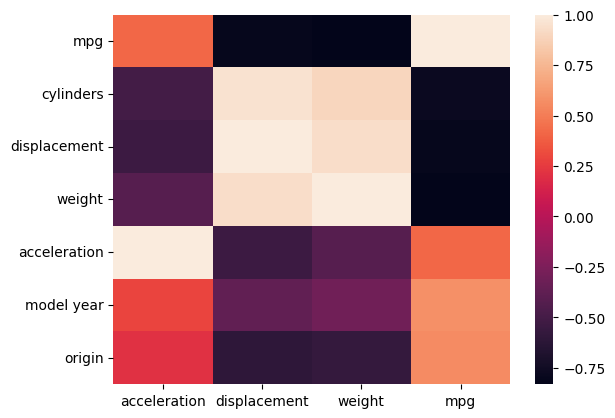

In [55]:
sns.heatmap(corrc)

# Realationship between acceleration and mpg

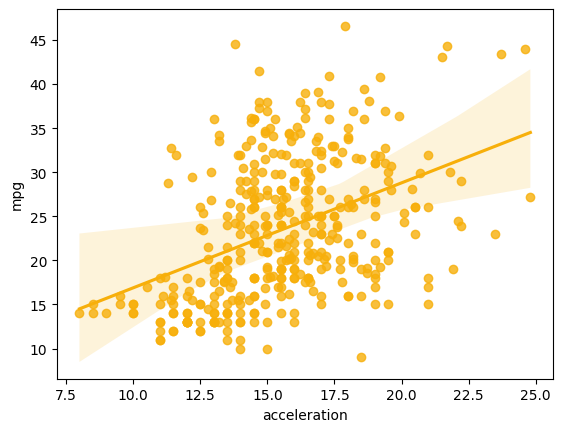

In [64]:
al_mpg=sns.regplot(data=df,x='acceleration',y='mpg',ci=100,units='mpg',color='#f7af0a')

**The above diagram show some-what positive linear relaitionship**

# Realationship between weight and mpg

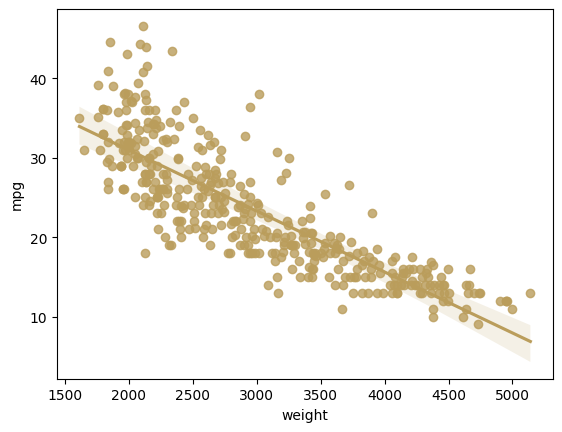

In [65]:
w_mpg=sns.regplot(data=df,x='weight',y='mpg',ci=100,units='mpg',color='#ba9d5b')

**Above plot shows negative linear relationship between Weight and MPG, Which make sense as a car will burn more fuel if it weighs more**

# Realationship between displacement and mpg

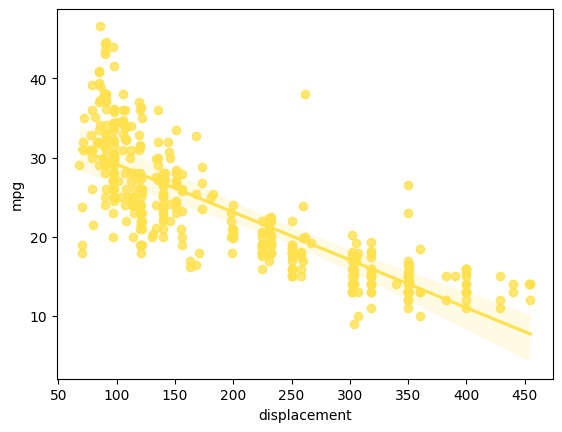

In [76]:
dis_mpg=sns.regplot(data=df,x='displacement',y='mpg',ci=100,units='mpg',color='#ffe14d')

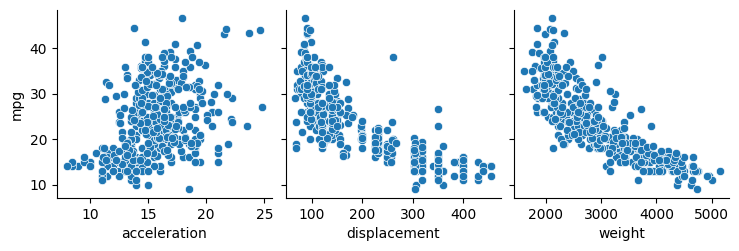

In [77]:
sns.pairplot(df,y_vars=['mpg'],x_vars=['acceleration','displacement','weight'])

**This plot also shows negative linear relationship between the two variavbles**

# Now we will compare average mpg for each number of cylinders

In [90]:
cld=df.groupby('cylinders').mean()
cld

C:\Users\OMKAR\AppData\Local\Temp\ipykernel_13692\565645541.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cld=df.groupby('cylinders').mean()


,mpg,displacement,weight,acceleration,model year,origin
cylinders,,,,,,
3,20.550000,72.500000,2398.500000,13.250000,75.500000,3.000000
4,29.286765,109.796569,2308.127451,16.601471,77.073529,1.985294
5,27.366667,145.000000,3103.333333,18.633333,79.000000,2.000000
6,19.985714,218.142857,3198.226190,16.263095,75.928571,1.190476
8,14.963107,345.009709,4114.718447,12.955340,73.902913,1.000000


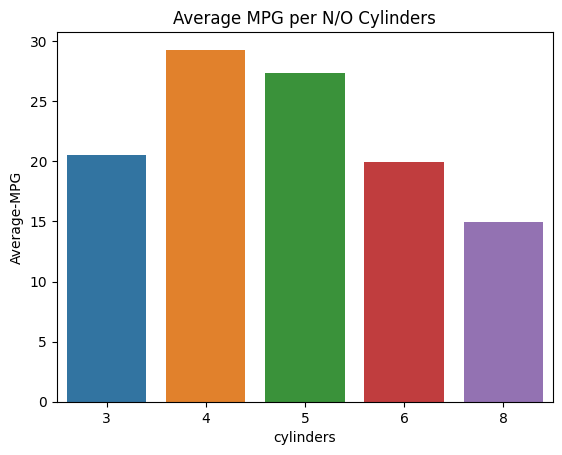

In [81]:
sns.barplot(data=cld.reset_index(),x='cylinders',y='mpg')
plt.title('Average MPG per N/O Cylinders')
plt.ylabel('Average-MPG')
plt.show()

**Above barplot shows cars with 4 cylinders guves highest amount of MPG and cars with 8 cylinders gives lowest amount of MPG.**

<Axes: xlabel='cylinders', ylabel='mpg'>

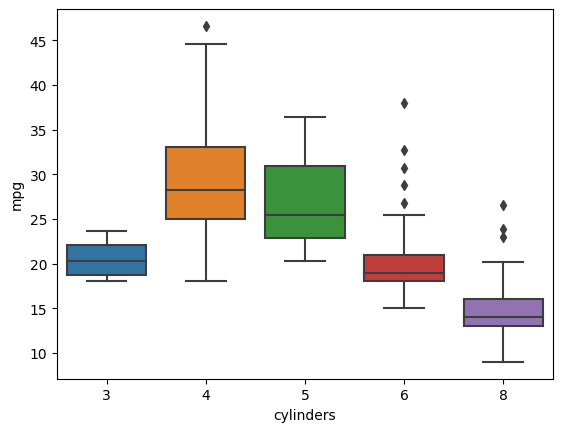

In [96]:
sns.boxplot(data=df,x='cylinders',y='mpg')

**There are several outliers in cars with 6 and 8 cylinders, Which should be looked into**

In [100]:
df6c=df.loc[df['cylinders']==6]
df6c.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,84.000000,84.0,84.000000,84.000000,84.000000,84.000000,84.000000
mean,19.985714,6.0,218.142857,3198.226190,16.263095,75.928571,1.190476
std,3.807322,0.0,32.293512,332.297419,2.021140,3.251638,0.548298
min,15.000000,6.0,145.000000,2472.000000,11.300000,70.000000,1.000000
25%,18.000000,6.0,199.750000,2941.250000,15.075000,74.000000,1.000000
50%,19.000000,6.0,228.000000,3201.500000,16.100000,76.000000,1.000000
75%,21.000000,6.0,250.000000,3430.500000,17.600000,78.000000,1.000000
max,38.000000,6.0,262.000000,3907.000000,21.000000,82.000000,3.000000


In [149]:
df6c.shape

(84, 9)

**plotting the outliers**

<Axes: ylabel='mpg'>

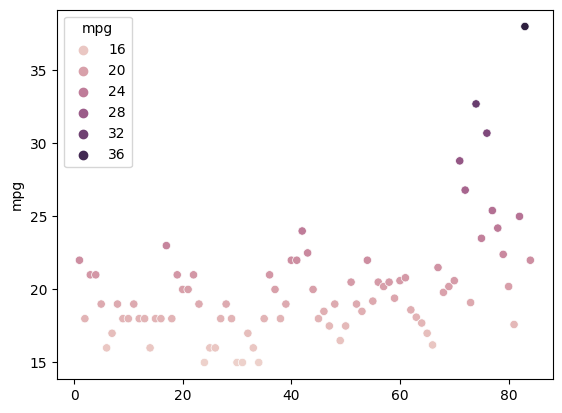

In [156]:
x6=list(range(1,85))
y6=df6c['mpg']
sns.scatterplot(x=x6,y=y6,hue=df6c['mpg'])

**We can see the outliers above 32 mpg in above plot**

**Now using above table and plot we will locate the outliers**

In [148]:
df6col=df6c.loc[(df6c['mpg']>=30) &(df6c['mpg']<=40)]
df6col

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
333,32.7,6,168.0,132,2910,11.4,80,3,datsun 280-zx
360,30.7,6,145.0,76,3160,19.6,81,2,volvo diesel
387,38.0,6,262.0,85,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


**These are our outliers, now it should be studied why these cars perfomed very well compare to other cars with 6 cylinders**


**Now we will do same with cars with 8 cylinders**

In [107]:
df8c=df.loc[df['cylinders']==8]
df8c.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,103.000000,103.0,103.000000,103.000000,103.000000,103.000000,103.0
mean,14.963107,8.0,345.009709,4114.718447,12.955340,73.902913,1.0
std,2.836284,0.0,46.776376,448.833159,2.224759,3.021214,0.0
min,9.000000,8.0,260.000000,3086.000000,8.000000,70.000000,1.0
25%,13.000000,8.0,305.000000,3799.000000,11.500000,72.000000,1.0
50%,14.000000,8.0,350.000000,4140.000000,13.000000,73.000000,1.0
75%,16.000000,8.0,360.000000,4403.500000,14.000000,76.000000,1.0
max,26.600000,8.0,455.000000,5140.000000,22.200000,81.000000,1.0


**plotting the outliers**

In [157]:
df8c.shape

(103, 9)

<Axes: ylabel='mpg'>

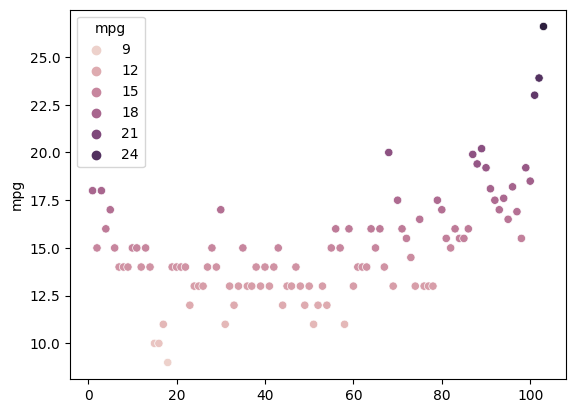

In [158]:
x8=list(range(1,104))
y8=df8c['mpg']
sns.scatterplot(x=x8,y=y8,hue=df8c['mpg'])

In [159]:
df8col=df8c.loc[(df8c['mpg']>=21) &(df8c['mpg']<=30)]
df8col

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
298,23.0,8,350.0,125,3900,17.4,79,1,cadillac eldorado
300,23.9,8,260.0,90,3420,22.2,79,1,oldsmobile cutlass salon brougham
364,26.6,8,350.0,105,3725,19.0,81,1,oldsmobile cutlass ls


**These are our outliers, now it should be studied why these cars perfomed very well compare to other cars with 8 cylinders**

# Now we will compare average mpg for each origin of car.

In [80]:
origin=df.groupby('origin').mean()
origin

C:\Users\OMKAR\AppData\Local\Temp\ipykernel_13692\1218776521.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  origin=df.groupby('origin').mean()


,mpg,cylinders,displacement,weight,acceleration,model year
origin,,,,,,
1,20.083534,6.248996,245.901606,3361.931727,15.033735,75.610442
2,27.891429,4.157143,109.142857,2423.300000,16.787143,75.814286
3,30.450633,4.101266,102.708861,2221.227848,16.172152,77.443038


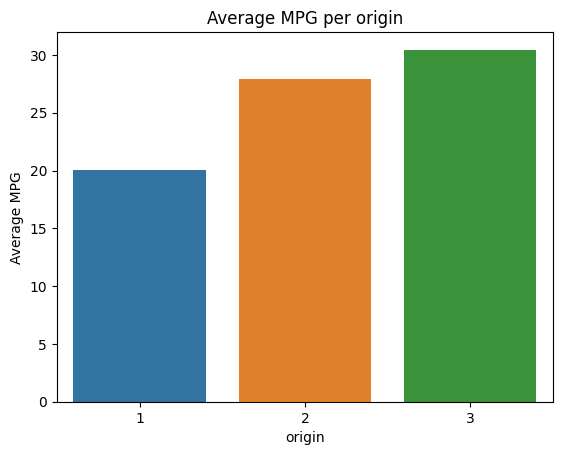

In [88]:
sns.barplot(data=origin.reset_index(),x='origin',y='mpg')
plt.title('Average MPG per origin')
plt.ylabel('Average MPG')
plt.show()

**Aove plot shows cars from origin "3" performed best in terms of MPG**

<Axes: xlabel='origin', ylabel='mpg'>

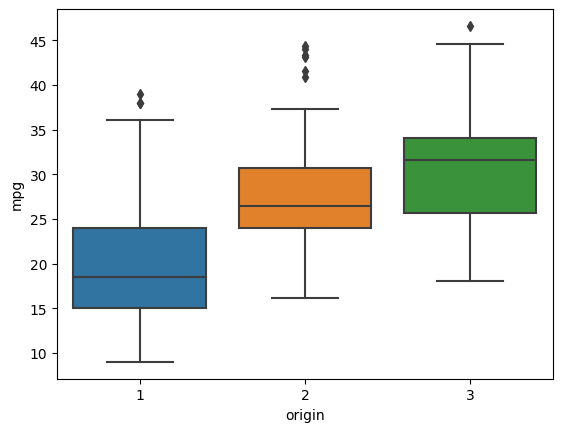

In [97]:
sns.boxplot(data=df,x='origin',y='mpg')

**Outliers in origin 2 should be examined**

In [162]:
df2o=df.loc[df['origin']==2]
df2o.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.0
mean,27.891429,4.157143,109.142857,2423.300000,16.787143,75.814286,2.0
std,6.723930,0.500310,22.582079,490.043191,3.045687,3.469506,0.0
min,16.200000,4.000000,68.000000,1825.000000,12.200000,70.000000,2.0
25%,24.000000,4.000000,92.250000,2067.250000,14.500000,73.000000,2.0
50%,26.500000,4.000000,104.500000,2240.000000,15.700000,76.000000,2.0
75%,30.650000,4.000000,121.000000,2769.750000,18.900000,79.000000,2.0
max,44.300000,6.000000,183.000000,3820.000000,24.800000,82.000000,2.0


**Plotting the outliesr**

<Axes: ylabel='mpg'>

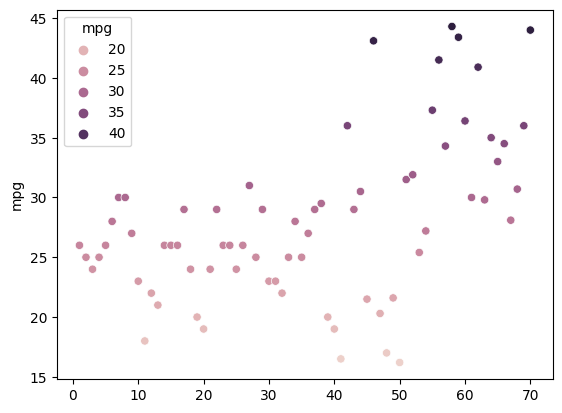

In [163]:
x2=list(range(1,71))
y2=df2o['mpg']
sns.scatterplot(x=x2,y=y2,hue=df2o['mpg'])

**In above plot we can see outliers above 40 mpg, let us find these outliers**

In [164]:
o2ol=df2o.loc[df2o['mpg']>40]
o2ol

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
244,43.1,4,90.0,48,1985,21.5,78,2,volkswagen rabbit custom diesel
309,41.5,4,98.0,76,2144,14.7,80,2,vw rabbit
325,44.3,4,90.0,48,2085,21.7,80,2,vw rabbit c (diesel)
326,43.4,4,90.0,48,2335,23.7,80,2,vw dasher (diesel)
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup


**These are the outliers, it should be studied why these cars from origin 2 performed better than other cars from origin 2**